C:\Users\vatch\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\vatch\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\vatch\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\vatch\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

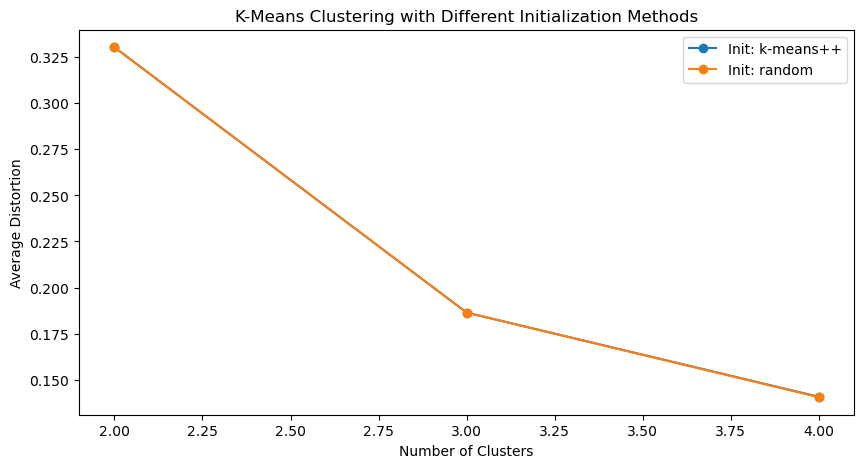

C:\Users\vatch\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\vatch\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\vatch\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Comparison of Distance Metrics:
euclidean: 0.1864
cityblock: 0.1864
cosine: 0.0000


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cdist

# Load the dataset
data = pd.read_csv("C:\\Users\\vatch\\Downloads\\archive (5)\\cluster_data.csv")

# Selecting numerical features
X = data.iloc[:, :-1].values  # Features (excluding last column as target if applicable)

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Experimenting with different initialization methods
init_methods = ['k-means++', 'random']
k_values = [2, 3, 4]
results = {}

plt.figure(figsize=(10, 5))
for i, init in enumerate(init_methods):
    distortions = []
    for k in k_values:
        kmeans = KMeans(n_clusters=k, init=init, random_state=42, n_init=10)
        kmeans.fit(X_scaled)
        distortions.append(sum(np.min(cdist(X_scaled, kmeans.cluster_centers_, 'euclidean'), axis=1)) / X_scaled.shape[0])
    
    results[init] = distortions
    plt.plot(k_values, distortions, marker='o', label=f'Init: {init}')

plt.title('K-Means Clustering with Different Initialization Methods')
plt.xlabel('Number of Clusters')
plt.ylabel('Average Distortion')
plt.legend()
plt.show()

# Comparing different distance metrics
distance_metrics = ['euclidean', 'cityblock', 'cosine']
metric_results = {}

for metric in distance_metrics:
    kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    metric_results[metric] = sum(np.min(cdist(X_scaled, kmeans.cluster_centers_, metric), axis=1)) / X_scaled.shape[0]

print("Comparison of Distance Metrics:")
for metric, distortion in metric_results.items():
    print(f"{metric}: {distortion:.4f}")